# Ridge regression Practical

In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [3]:
#Dataset is being called from sklearn.dataset library to perform L2 regulation or Ridge regression
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
X  = housing.data
y = housing.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [5]:
#train test split method has been applied in the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [14]:
#Standarising the training dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#ridge regression object is being created
ridge_regg = Ridge()
ridge_regg

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [16]:
# parameter tunning is performed in this section using grid search cv to choose best fit parameter
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,10000]}
ridgecv = GridSearchCV(ridge_regg,parameters,scoring='neg_mean_squared_error',cv=5)
#Now model is being trained
ridgecv.fit(X_train,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [17]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 1}
-0.5192653140005429


In [18]:
#now model is being predicted on the basis of X_test data to predict y_test
ridge_pred = ridgecv.predict(X_test)


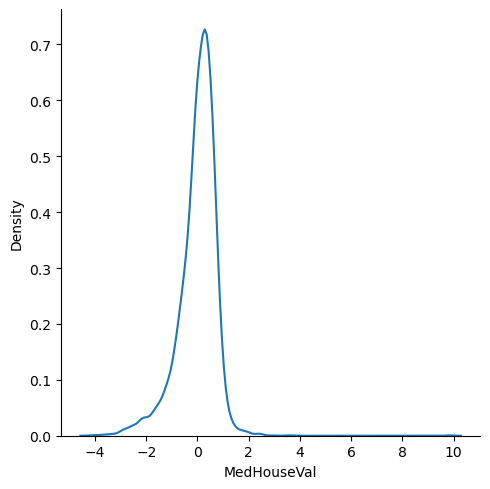

In [19]:
sns.displot(ridge_pred - y_test,kind='kde')

In [20]:
from sklearn.metrics import r2_score
score = r2_score(ridge_pred,y_test)
score

0.3374440457500305

In [21]:
comparison_df = pd.DataFrame({'Actual' :y_test, 'predicted' :ridge_pred})
#this is the comparision between Actual and predicted outputs
print(comparison_df.tail())

        Actual  predicted
15362  2.63300   1.991888
16623  2.66800   2.249260
18086  5.00001   4.468476
2144   0.72300   1.187972
3665   1.51500   2.009221
